In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor
from snewpy.models.ccsn import Tamborra_2014

mpl.rc('font', size=20)
%matplotlib inline

In [7]:
def moving_average(a, n=3, zero_padding = False, const_padding = False):
    if zero_padding:
        a = np.insert(a, np.zeros(n-1,dtype=int), np.zeros(n-1), axis=-1)
        a = np.roll(a, -int((n-1)/2), axis=-1)
    if const_padding:
        l1 = int(n/2)
        if n%2 != 1: # n is even
            l2 = l1-1
        else: # n is odd
            l2 = l1
            ind2 = -np.arange(1,(n+1)/2).astype(int)
        a = np.insert(a, np.zeros(l1, dtype=int), np.ones(l1)*a[0])
        a = np.insert(a, -np.ones(l2, dtype=int), np.ones(l2)*a[-1])
    ret = np.cumsum(a, dtype=float, axis=-1)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [8]:
Tamborra_2014.param

{'progenitor_mass': <Quantity [11.2, 20. , 27. ] solMass>,
 'direction': [1, 2, 3]}

In [3]:
Tamborra_2014.get_param_combinations()

({'progenitor_mass': <Quantity 11.2 solMass>, 'direction': 1},
 {'progenitor_mass': <Quantity 20. solMass>, 'direction': 1},
 {'progenitor_mass': <Quantity 27. solMass>, 'direction': 1},
 {'progenitor_mass': <Quantity 27. solMass>, 'direction': 2},
 {'progenitor_mass': <Quantity 27. solMass>, 'direction': 3})

In [4]:
m27_1 = Tamborra_2014(progenitor_mass=27*u.solMass, direction=1)
m27_2 = Tamborra_2014(progenitor_mass=27*u.solMass, direction=2)
m27_3 = Tamborra_2014(progenitor_mass=27*u.solMass, direction=3)

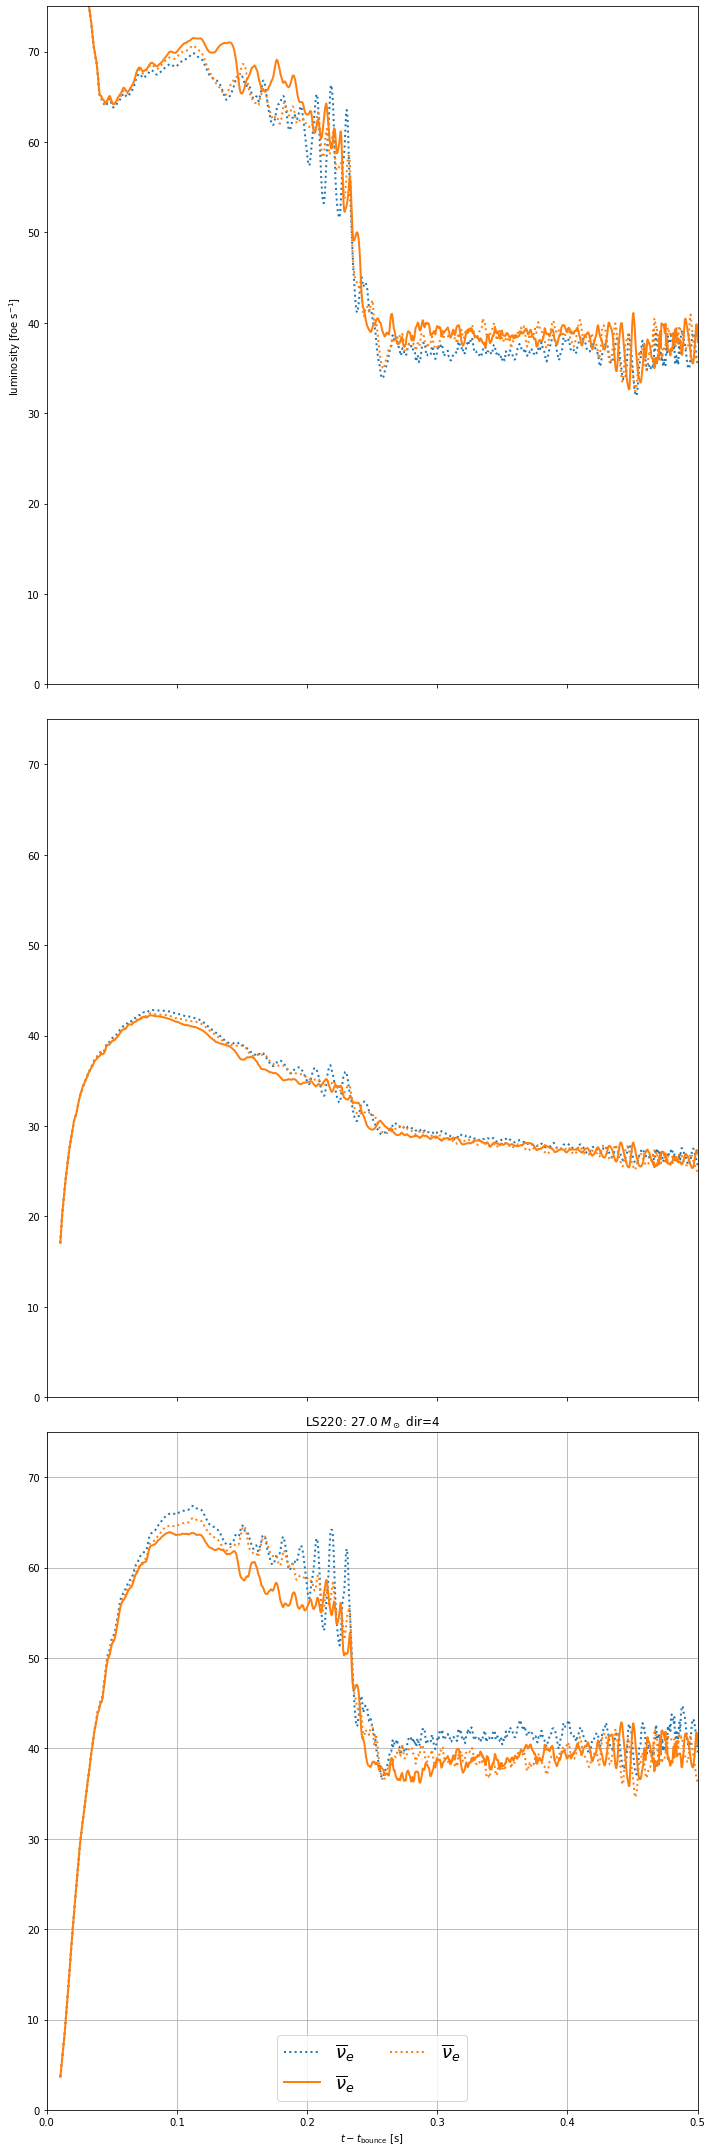

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30), sharex=True, sharey=True, tight_layout=True)

for j, model in enumerate([m27_1, m27_2, m27_3]):
    for i, flavor in enumerate(Flavor):
        if flavor == Flavor.NU_X_BAR:
            continue
        ax = axes[i]
        ax.plot(model.time, model.luminosity[flavor]/1e51,  # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color='C0' if model == m27_1 else 'C1',
                ls='-' if model == m27_2 else ':',
                lw=2)
    ax.set(xlim=(0.0, 0.5),
           ylim=(0.0, 75.0),
           xlabel=r'$t-t_{\rm bounce}$ [s]',
           title=r'{}: {} $M_\odot$ dir={}'.format(model.metadata['EOS'], model.metadata['Progenitor mass'].value, (i+1)))
    ax.grid()
    ax.legend(loc='lower center', ncol=2, fontsize=18)

axes[0].set(ylabel=r'luminosity [foe s$^{-1}$]');

In [ ]:

fig, axs = plt.subplots(2, 2, figsize = (10,10),tight_layout=True)
ax = axs.ravel()
for j, flavor in enumerate(Flavor):
    for i, model in enumerate([m27_1, m27_2, m27_3]):
        ax[j].plot(model.time, model.luminosity[flavor]/1e51,  # Report luminosity in units foe/s
                    label='dir = {}'.format(i+1),
                    lw=2,
                    ls='--' if i == 1 else '-')
    ax[j].set(xlim=(0.0, 0.35),
              ylim=(0.0, 75.0),
              xlabel=r'$t-t_{\rm bounce}$ [s]',
              ylabel=r'luminosity [foe s$^{-1}$]',
              title=r'{}: {} $M_\odot$, {}'.format(model.metadata['EOS'], model.metadata['Progenitor mass'].value, flavor.to_tex()))
    ax[j].grid()
    ax[j].legend(loc='lower center', ncol=2, fontsize=15)

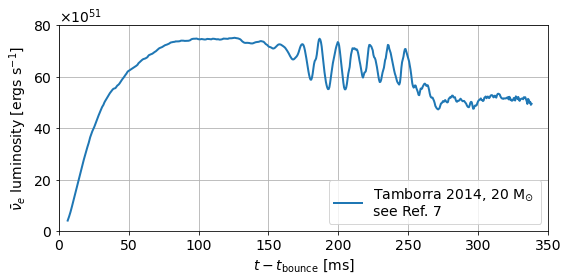

In [7]:
m20 = Tamborra_2014(progenitor_mass=20*u.solMass, direction=1)
model = m20
flavor = Flavor.NU_E_BAR
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True, sharey=True, tight_layout=True)
ax.plot(m20.time*1000, model.luminosity[flavor],  # Report luminosity in units ergs/s
            label = 'Tamborra 2014, 20 M$_{{\odot}}$ \nsee Ref. 7',
            lw=2)
ax.set(xlim=(0, 350),
       ylim=(0.0, 80E51))
ax.tick_params(labelsize=14)
ax.grid()
ax.legend(fontsize = 14)
ax.set_xlabel(r'$t-t_{\rm bounce}$ [ms]', fontsize=14)
ax.set_ylabel(r'$\bar{\nu}_e$ luminosity [ergs s$^{-1}$]', fontsize=14)

ax.ticklabel_format(axis='y', style='sci', scilimits=(51, 51), useOffset=False, useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(14)
ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('final_SASI_lumi.png', dpi = 200, facecolor = 'white')

In [20]:
m11 = Tamborra_2014(progenitor_mass=11.2*u.solMass, direction=1)
model = m11

time = model.time*1000

lumi_nue = model.luminosity[Flavor.NU_E]
lumi_nuebar = model.luminosity[Flavor.NU_E_BAR]
lumi_nux = model.luminosity[Flavor.NU_X]

avg_lumi_nue = moving_average(lumi_nue, n = 5, const_padding=True)
avg_lumi_nuebar = moving_average(lumi_nuebar, n = 5, const_padding=True)
avg_lumi_nux = moving_average(lumi_nux, n = 5, const_padding=True)

rel_lumi_nue = (lumi_nue - avg_lumi_nue)/avg_lumi_nue
rel_lumi_nuebar = (lumi_nuebar - avg_lumi_nuebar)/avg_lumi_nuebar
rel_lumi_nux = (lumi_nux - avg_lumi_nux)/avg_lumi_nux

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


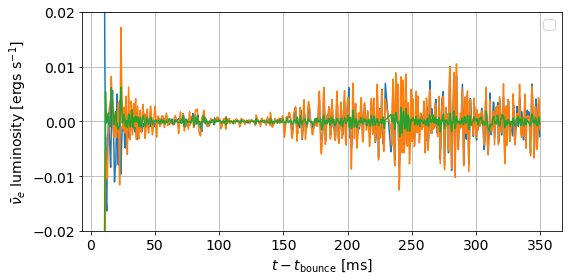

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True, sharey=True, tight_layout=True)
ax.plot(time, rel_lumi_nue)
ax.plot(time, rel_lumi_nuebar)
ax.plot(time, rel_lumi_nux)



#ax.set(xlim=(0, 350),
ax.set_ylim((-0.02, 0.02))
ax.tick_params(labelsize=14)
ax.grid()
ax.legend(fontsize = 14)
ax.set_xlabel(r'$t-t_{\rm bounce}$ [ms]', fontsize=14)
ax.set_ylabel(r'$\bar{\nu}_e$ luminosity [ergs s$^{-1}$]', fontsize=14)

#ax.ticklabel_format(axis='y', style='sci', scilimits=(51, 51), useOffset=False, useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(14)
ax.tick_params(labelsize=14)

plt.tight_layout()
#plt.savefig('final_m11_rellumi.png', dpi = 200, facecolor = 'white')

In [22]:
time_nue = [11.374187558031569, 14.623955431754874, 18.52367688022284, 21.773444753946148, 25.673166202414112, 28.27298050139276, 32.17270194986072, 35.74744661095636, 38.99721448467967, 41.59702878365831, 46.14670380687094, 49.721448467966574, 53.94614670380687, 57.5208913649025, 60.77065923862581, 64.9953574744661, 68.24512534818942, 74.4196843082637, 79.94428969359332, 86.44382544103992, 90.99350046425255, 94.56824512534818, 99.44289693593315, 104.3175487465181, 110.49210770659238, 114.06685236768801, 118.29155060352832, 121.54131847725162, 124.79108635097492, 129.01578458681522, 131.61559888579387, 134.54038997214485, 135.51532033426184, 138.11513463324047, 139.74001857010214, 142.33983286908077, 143.96471680594243, 144.6146703806871, 145.91457753017642, 147.21448467966573, 148.8393686165274, 152.73909006499537, 154.363974001857, 156.6388115134633, 158.91364902506965, 158.91364902506965, 159.88857938718664, 161.83844011142062, 164.43825441039925, 167.0380687093779, 168.0129990714949, 169.9628597957289, 171.91272051996285, 174.18755803156918, 175.81244196843082, 178.08727948003713, 182.63695450324977, 184.58681522748375, 185.2367688022284, 187.83658310120705, 189.78644382544104, 193.686165273909, 196.9359331476323, 198.56081708449398, 200.83565459610028, 203.4354688950789, 206.6852367688022, 209.28505106778087, 211.23491179201486, 212.85979572887652, 215.78458681522747, 217.73444753946146, 220.3342618384401, 224.88393686165273, 225.20891364902508, 228.45868152274838, 230.08356545961, 234.63324048282266, 235.60817084493965, 237.88300835654596, 240.48282265552461, 242.43268337975857, 244.7075208913649, 246.00742804085422, 248.9322191272052, 250.55710306406684, 251.85701021355618, 256.4066852367688, 258.3565459610028, 259.6564531104921, 260.30640668523677, 262.5812441968431, 266.1559888579387, 267.45589600742807, 269.0807799442897, 270.380687093779, 271.0306406685237, 272.9805013927577, 274.93036211699166, 276.88022284122565, 277.85515320334264, 279.1550603528319, 280.7799442896936, 281.7548746518106, 285.6545961002785, 286.3045496750232, 288.2544103992572, 288.5793871866295, 290.2042711234912, 291.1792014856082, 293.7790157845868, 297.0287836583101, 297.6787372330548, 300.2785515320334, 300.2785515320334, 301.2534818941504, 302.55338904363975, 304.1782729805014, 304.82822655524603, 307.753017641597, 308.727948003714, 310.3528319405757, 313.60259981429897, 316.2024141132776, 317.50232126276694, 319.4521819870009, 321.4020427112349, 322.3769730733519, 324.3268337975859, 325.3017641597029, 326.9266480965645, 329.52646239554315, 330.50139275766014, 332.4512534818941, 332.4512534818941, 333.75116063138347, 335.3760445682451, 337.0009285051068, 338.62581244196843, 340.5756731662024, 342.20055710306406, 343.5004642525534, 346.100278551532, 347.40018570102137, 348.37511606313836]
lumi_nue = [-0.0007416563658838027, -0.00024721878862793423, -0.00024721878862793423, -0.00024721878862793423, -0.00024721878862793423, -0.00024721878862793423, -0.00024721878862793423, -0.0007416563658838027, -0.00024721878862793423, -0.0007416563658838027, -0.0007416563658838027, -0.0007416563658838027, -0.0007416563658838027, -0.00024721878862793423, 0.0007416563658838027, 0.00024721878862793423, 0.0007416563658838027, 0.0017305315203955396, 0.0017305315203955396, 0.0017305315203955396, 0.0007416563658838027, 0.0007416563658838027, 0.0012360939431396711, 0.0017305315203955396, -0.00024721878862793423, 0.0012360939431396711, 0.003213844252163145, 0.0051915945611866465, 0.006674907292954252, 0.00716934487021012, 0.010135970333745359, 0.00964153275648949, 0.011619283065512964, 0.011619283065512964, 0.012608158220024729, 0.008158220024721885, 0.0051915945611866465, 0.0051915945611866465, 0.003708281829419041, 0.003708281829419041, -0.002224969097651436, -0.004697156983930778, -0.014091470951792334, -0.014091470951792334, -0.024474660074165655, -0.0289245982694685, -0.029419035846724367, -0.03683559950556242, -0.03634116192830655, -0.043757725587144636, -0.055129789864029666, -0.06254635352286775, -0.05957972805933254, -0.06847960444993823, -0.0665018541409147, -0.07391841779975278, -0.0546353522867738, -0.06304079110012362, -0.06402966625463535, -0.08281829419035847, -0.07540173053152038, -0.07886279357231152, -0.06847960444993823, -0.06205191594561188, -0.07391841779975278, -0.06205191594561188, -0.07490729295426451, -0.06155747836835601, -0.06501854140914709, -0.08529048207663786, -0.06847960444993823, -0.08034610630407912, -0.06847960444993823, -0.06996291718170583, -0.08331273176761433, -0.07935723114956739, -0.08529048207663786, -0.0877626699629172, -0.0689740420271941, -0.07935723114956739, -0.05117428924598272, -0.06699629171817062, -0.05364647713226206, -0.07342398022249691, -0.07490729295426451, -0.08529048207663786, -0.06946847960444996, -0.09864029666254637, -0.08133498145859086, -0.07243510506798517, -0.06304079110012362, -0.05760197775030901, -0.07886279357231152, -0.07886279357231152, -0.05760197775030901, -0.04771322620519161, -0.0546353522867738, -0.04721878862793574, -0.06600741656365883, -0.0546353522867738, -0.07144622991347344, -0.06205191594561188, -0.06847960444993823, -0.0561186650185414, -0.06699629171817062, -0.05760197775030901, -0.06551297898640296, -0.0561186650185414, -0.05760197775030901, -0.04820766378244748, -0.06205191594561188, -0.05315203955500619, -0.06155747836835601, -0.04573547589616811, -0.03337453646477134, -0.0427688504326329, -0.03782447466007419, -0.03386897404202721, -0.0289245982694685, -0.02595797280593326, -0.038318912237330055, -0.04326328800988877, -0.03386897404202721, -0.05760197775030901, -0.06946847960444996, -0.060568603213844274, -0.05661310259579727, -0.07243510506798517, -0.05760197775030901, -0.07095179233621757, -0.06996291718170583, -0.06847960444993823, -0.06254635352286775, -0.05760197775030901, -0.04524103831891224, -0.05166872682323859, -0.04771322620519161, -0.052657601977750323, -0.04622991347342398, -0.05908529048207667, -0.060074165636588406, -0.05760197775030901, -0.04227441285537703, -0.052163164400494455, -0.041285537700865266]

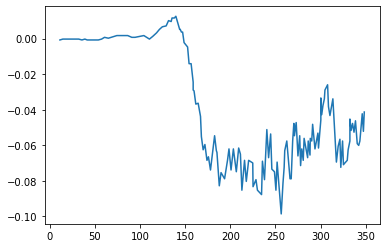

In [23]:
plt.plot(time_nue, lumi_nue)